Problem Statement:
You are required to model the prices of cars with the available independent variables. It will be
used by management to understand how exactly the prices vary with the independent variables.
They can accordingly manipulate the design of the cars, the business strategy etc. to meet
certain price levels. Further, the model will be good for management to understand the pricing
dynamics of the new market.

- Import all the libraries and set up all the requirements that you will need .

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

- Import the data set and check the following

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment (2).csv


In [ ]:
df=pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


- dimension of the dataset.

In [ ]:
df.shape

(205, 26)

- data types

In [ ]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

- Missing value available in the dataset

In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

No missing values in the dataset.

- Descriptive statistics of data and write the observation.

In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


1. No missing values in the dataset.
2. symboling column has negative value.

DATA CLEANING:

- Create the column as 'CompanyName' using 'CarName' Column. List down the unique
'CompanyName'.

In [ ]:
df['CompanyName']=df['CarName'].apply(lambda x:x.split(' ')[0])
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

- Check the correctness of data in the 'CompanyName' column.

In [ ]:
def name_replace(past,present):
  df['CompanyName'].replace(past,present,inplace=True)

name_replace('maxda','mazda')
name_replace('nissan','Nissan')
name_replace('porcshce','porsche')
name_replace('vw','volkswagen')
name_replace('vokswagen','volkswagen')
name_replace('toyouta','toyota')

In [ ]:
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

- Check the duplicate data in the dataset.

In [ ]:
df[df.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName


NO duplicates found in the dataset.

Exploratory Data Analysis:

- Visualize the 'price' column using displot and boxplot. Write down the observations.

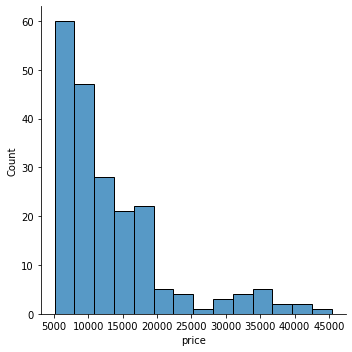

In [ ]:
sb.displot(df['price'])
plt.show()


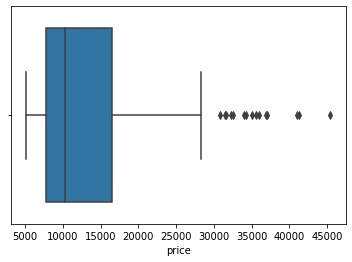

In [ ]:
sb.boxplot(df['price'])
plt.show()

Most of the cars price is below 20,000

Minimum price of car is 5000. 

middle most value is approx. 10000. 

Max value is around 28000. 

There are extreme outliers present. These might be premium cars.

- Perform the appropriate transformation to make the target as a gaussian distribution.

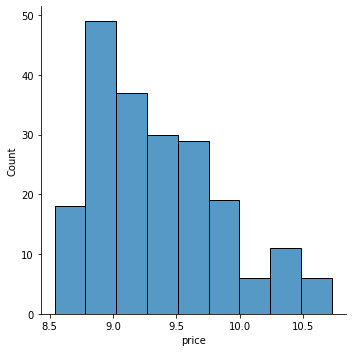

In [ ]:
transformed_target=np.log(df['price'])
sb.displot(transformed_target)

- Check the linear relationship between the dependent variable "Price" and the numerical
independent variables

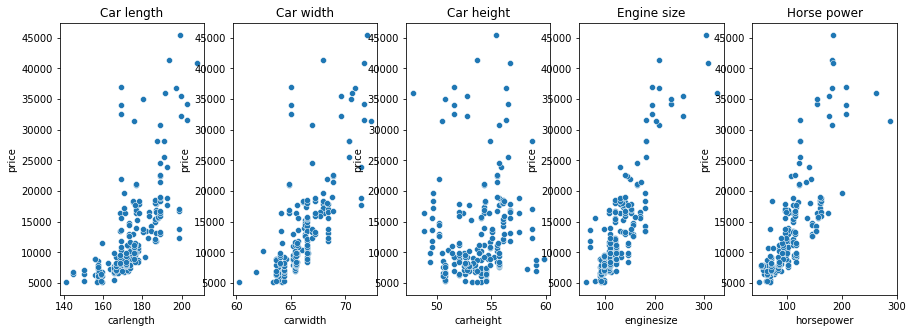

In [ ]:
fig, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(1,5,figsize=(15, 5))

sb.scatterplot(data=df, x='carlength', y='price', ax=ax1)
sb.scatterplot(data=df, x='carwidth', y='price', ax=ax2)
sb.scatterplot(data=df, x='carheight', y='price',ax=ax3)
sb.scatterplot(data=df, x='enginesize', y='price',ax=ax4)
sb.scatterplot(data=df, x='horsepower', y='price',ax=ax5)
ax1.set_title('Car length')
ax2.set_title('Car width')
ax3.set_title('Car height')
ax4.set_title('Engine size')
ax5.set_title('Horse power')
plt.show()

1.Carlength, Carwidth, Enginesize, Horsepower INCREASE WITH PRICE. 

2.Carheight DOES NOT HAVE A RELATIONSHIP WITH PRICE.

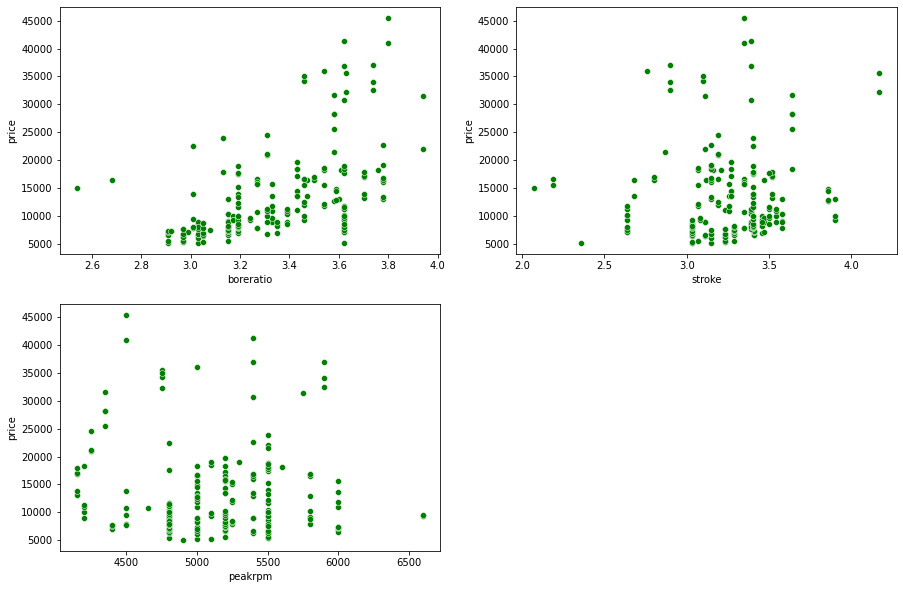

In [ ]:
col = ('boreratio','stroke', 'peakrpm')

plt.figure(figsize=(15,10))

for i, c in enumerate(col):
    plt.subplot(2,2, i+1)
    sb.scatterplot(data=df, x=c, y='price', color='green')

1. BORE RATIO ALSO LOOKS TO BE CORRELATED WITH PRICE.
2. STROKE AND PEAK RPM DO NOT HAVE A CORRELATION

- Checking the multicollinearity between the correlated independent variables above and
Price

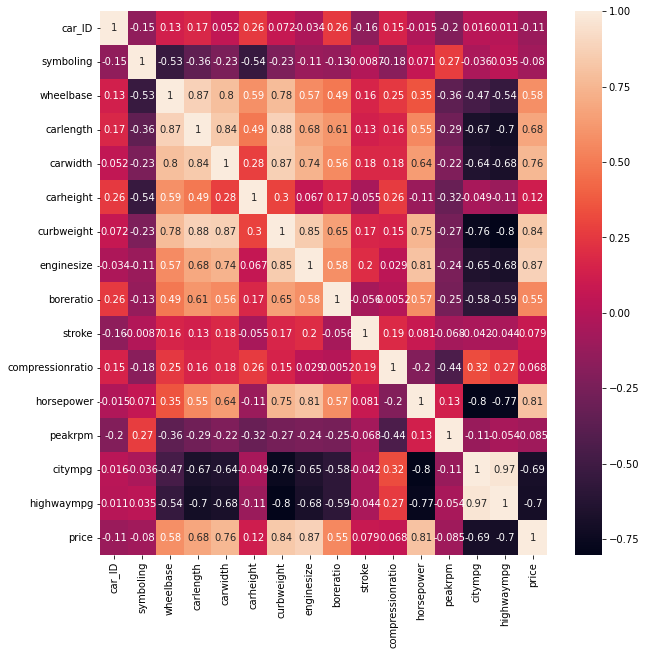

In [ ]:
plt.figure(figsize=(10,10))
sb.heatmap(df.corr(),annot=True)
plt.show()

EngineSize, Horsepower, curbweight, carwidth are highly correlated with target variable price.

- Perform Univariate, Bivariate, and Multivariate analyses to find the factors that affect the
Target variables.

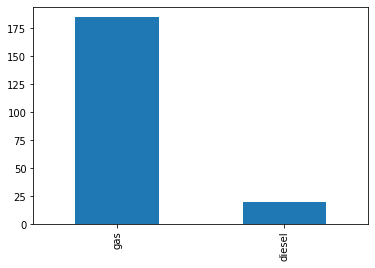

In [ ]:
#Univariate :
df['fueltype'].value_counts().plot(kind='bar')

Most of the cars are petrol (gas) kind.

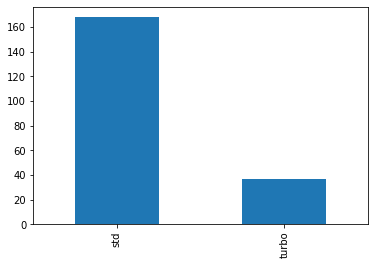

In [ ]:
df['aspiration'].value_counts().plot(kind='bar')

Most of the cars are standard aspiration type.

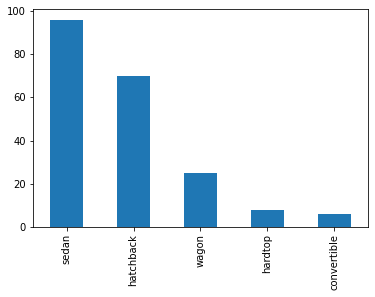

In [ ]:
df['carbody'].value_counts().plot(kind='bar')

1. Most of the cars are of Sedan and Hatchback.

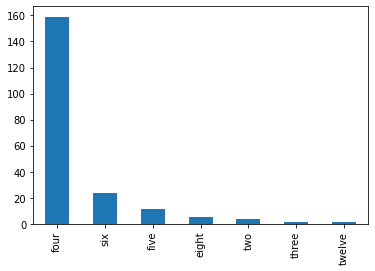

In [ ]:
df['cylindernumber'].value_counts().plot(kind='bar')

Most of the cars have 4 cylinders.

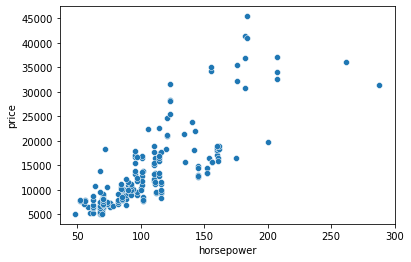

In [ ]:
sb.scatterplot(data=df, x='horsepower', y='price')
plt.show()

As horse power of the car increases, the price is also increasing.

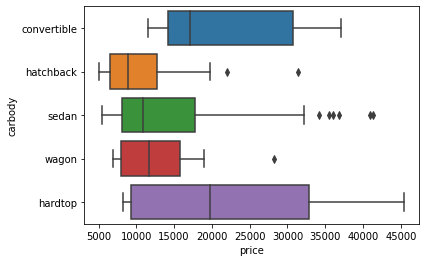

In [ ]:
# Bivariate:
sb.boxplot(data=df,x='price',y='carbody')

Hardtop car's have the widest Price distribution & high median price

Sedan's have more outliers.

In [ ]:
df['fueleconomy'] = (0.55 * df['citympg']) + (0.45 * df['highwaympg'])

In [ ]:
df['price'] = df['price'].astype('int')
temp = df.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
df_bin=['Budget','Medium','Highend']
df['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=df_bin)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,fueleconomy,carsrange
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495,alfa-romero,23.70,Medium
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500,alfa-romero,23.70,Medium
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500,alfa-romero,22.15,Medium
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950,audi,26.70,Medium
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450,audi,19.80,Medium


<Figure size 1800x432 with 0 Axes>

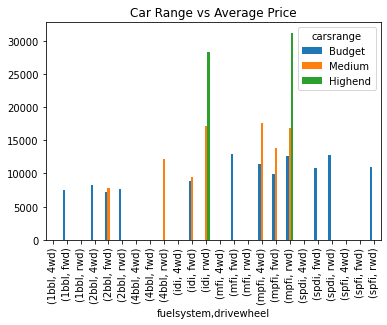

In [ ]:
plt.figure(figsize=(25, 6))

car = pd.DataFrame(df.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
car.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

High ranged cars prefer rwd drivewheel with idi or mpfi fuelsystem.

In [ ]:
df_lr = df[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
df_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


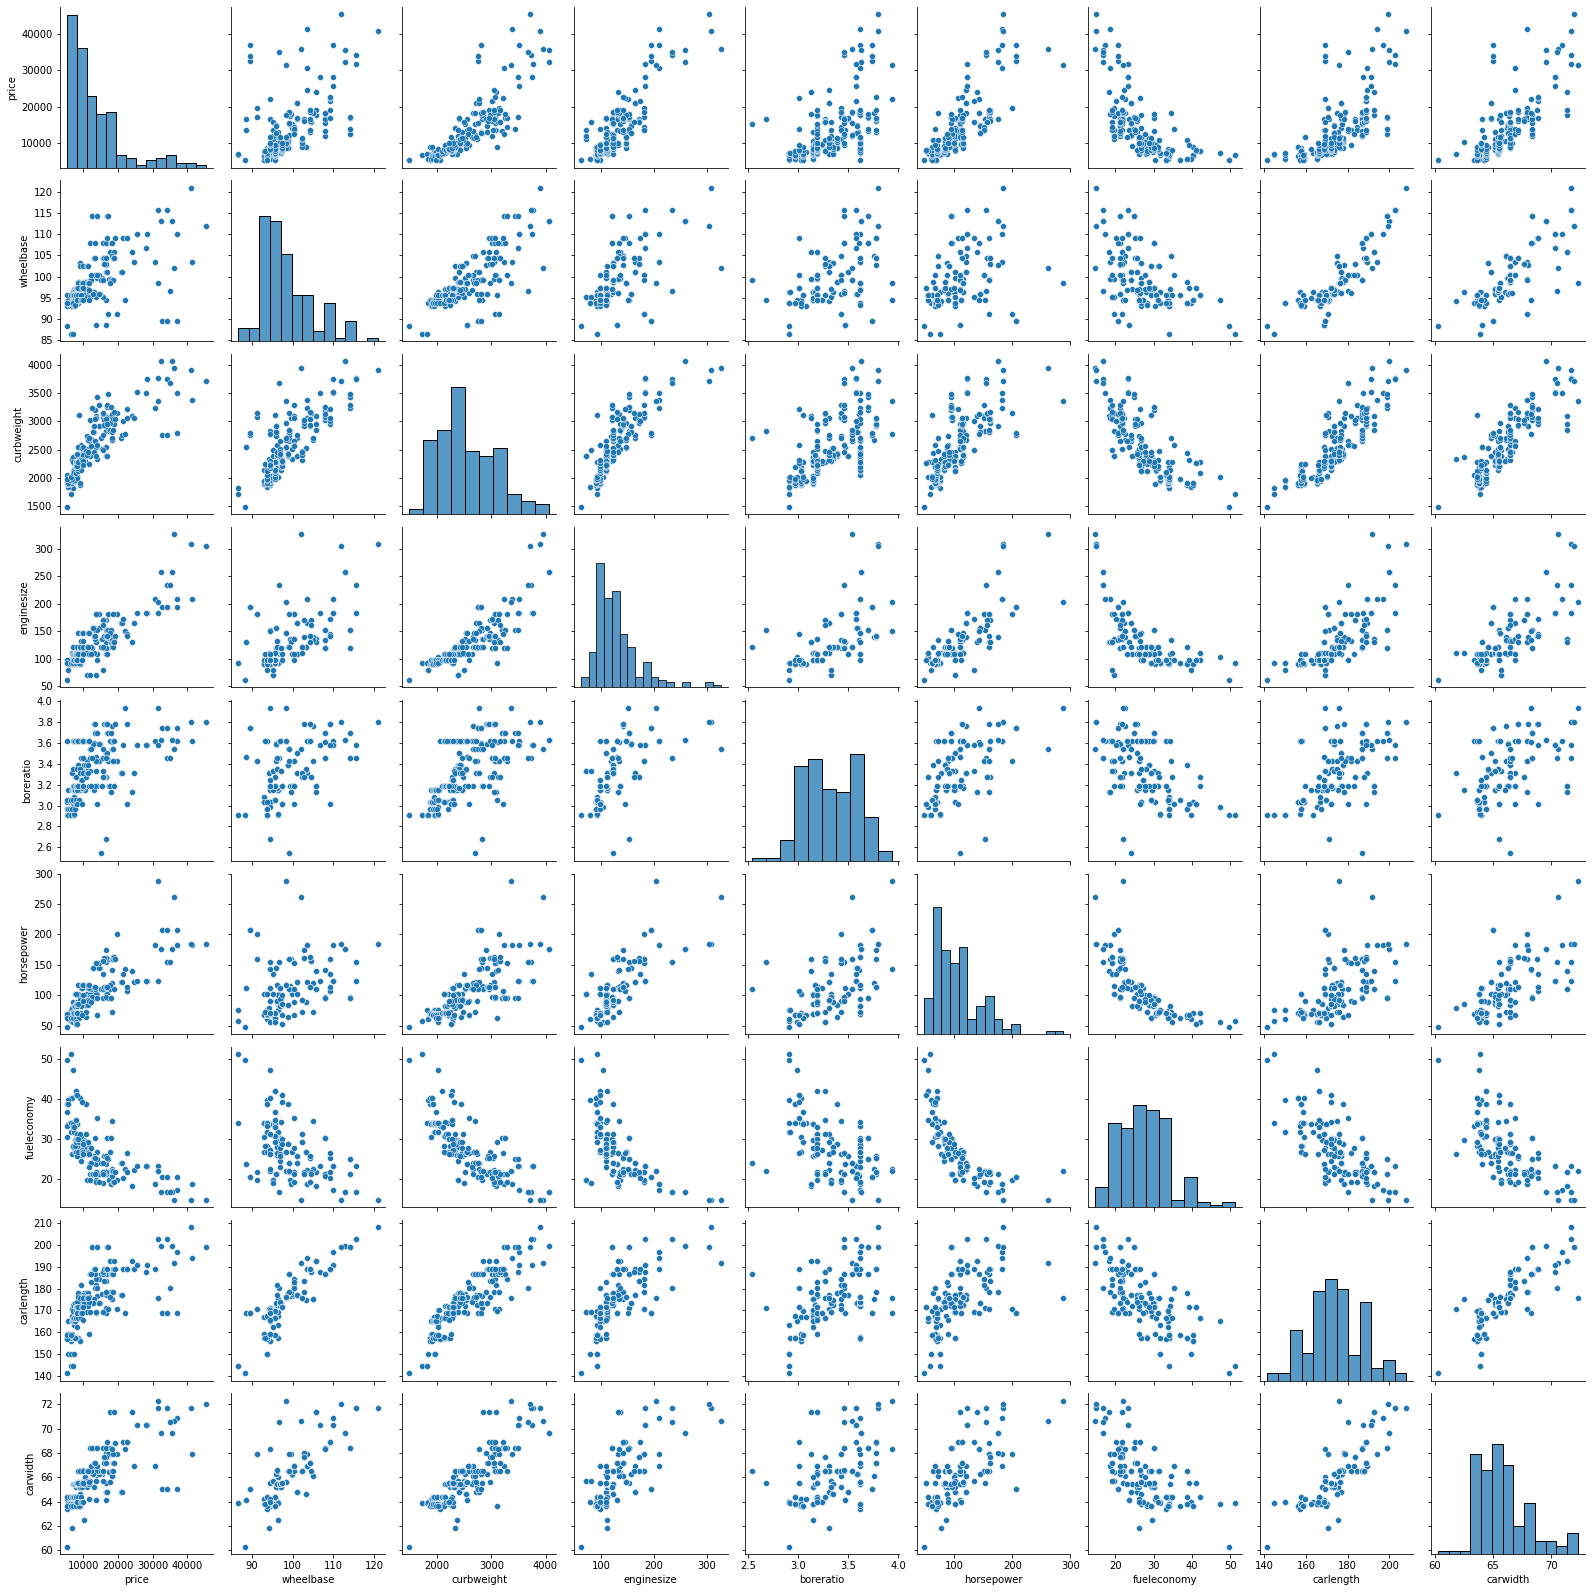

In [ ]:
sb.pairplot(df_lr)
plt.show()

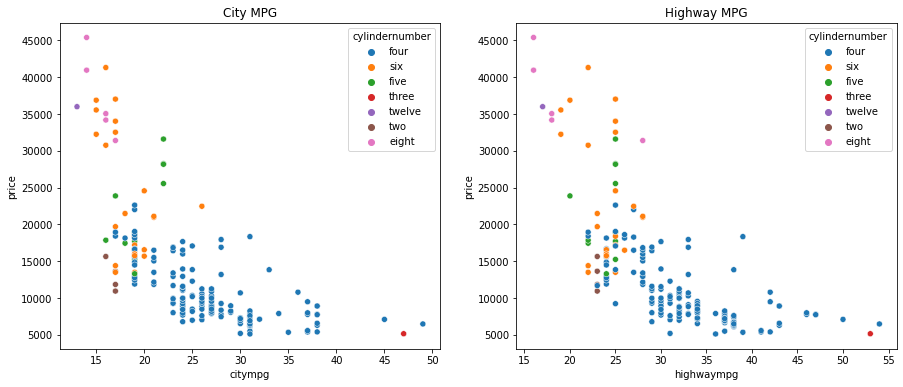

In [ ]:
#Multivariate: 
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 6))

sb.scatterplot(data=df, x='citympg', y='price', hue='cylindernumber', ax=ax1)
sb.scatterplot(data=df, x='highwaympg', y='price', hue='cylindernumber', ax=ax2)

ax1.set_title('City MPG')
ax2.set_title('Highway MPG')

plt.show()

The cars with lower city mpg & Highway mpg have high costs.

The low mpg cars have high number of cylinders.

Both plots look similar.

- Perform the preprocessing that is required for the model.

In [ ]:
df.drop(['CarName','car_ID'], axis = 1, inplace = True)
df.shape

(205, 27)

In [ ]:
df.drop(['symboling','CompanyName'],axis=1,inplace=True)
df.shape

(205, 25)

In [ ]:
#Encoding:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the df_lr

df_lr = dummies('fueltype',df_lr)
df_lr = dummies('aspiration',df_lr)
df_lr = dummies('carbody',df_lr)
df_lr = dummies('drivewheel',df_lr)
df_lr = dummies('enginetype',df_lr)
df_lr = dummies('cylindernumber',df_lr)
df_lr = dummies('carsrange',df_lr)

In [ ]:
df_lr.shape

(205, 31)

- Split the dataset into train and test data sets and perform the scaling on both
sets if necessary.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_train, df_test = train_test_split(df_lr, random_state = 10, test_size = 0.2)
print(df_train.shape)
print(df_test.shape)

(164, 31)
(41, 31)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [ ]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
160,0.065041,0.265306,0.235066,0.149798,0.464286,0.138365,0.746905,0.376119,0.350427,1,...,0,0,0,1,0,0,0,0,0,0
98,0.077727,0.247813,0.201707,0.145749,0.435714,0.132075,0.517194,0.317910,0.299145,1,...,0,0,0,1,0,0,0,0,1,0
127,0.717690,0.084548,0.491854,0.538462,0.857143,1.000000,0.156809,0.414925,0.401709,1,...,0,0,0,0,1,0,0,0,0,1
47,0.673551,0.769679,1.000000,0.797571,0.778571,0.805031,0.052270,0.873134,0.794872,1,...,0,0,0,0,1,0,0,0,0,1
91,0.038007,0.230321,0.166796,0.145749,0.435714,0.132075,0.517194,0.361194,0.299145,1,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,...,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.0,164.000000,164.000000,164.000000
mean,0.198688,0.347845,0.403787,0.259825,0.560540,0.341694,0.355940,0.482945,0.467688,0.920732,...,0.048780,0.012195,0.042683,0.804878,0.109756,0.006098,0.0,0.012195,0.402439,0.115854
std,0.202828,0.176961,0.199328,0.165111,0.195294,0.232427,0.184008,0.189066,0.178368,0.270984,...,0.216069,0.110092,0.202760,0.397508,0.313543,0.078087,0.0,0.110092,0.491891,0.321030
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.061839,0.230321,0.247673,0.145749,0.432143,0.138365,0.199450,0.376119,0.316239,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.120798,0.288630,0.354926,0.198381,0.550000,0.295597,0.324622,0.467164,0.435897,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,0.273304,0.434402,0.556342,0.323887,0.750000,0.427673,0.507909,0.608955,0.538462,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


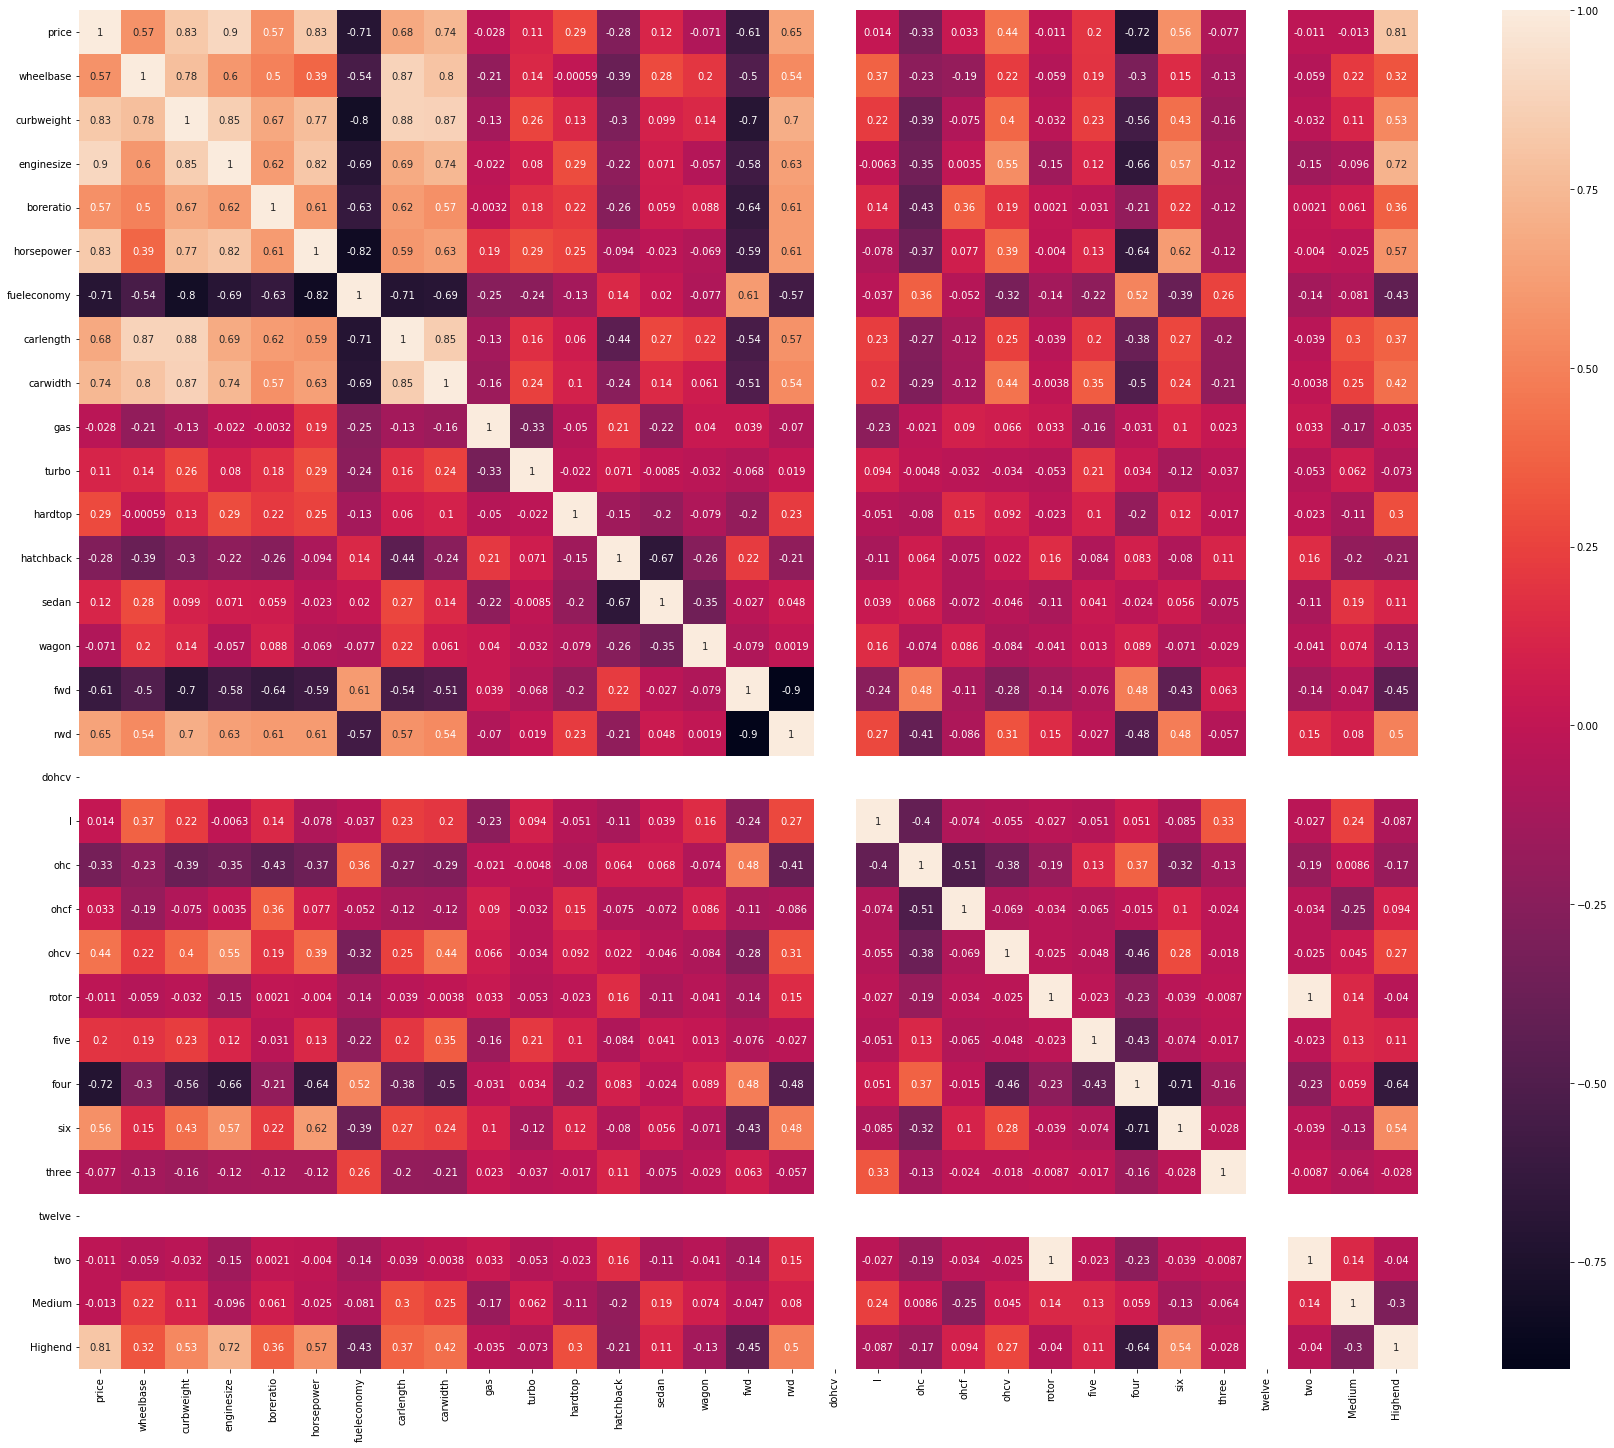

In [ ]:
plt.figure(figsize = (30, 25))
sb.heatmap(df_train.corr(),annot=True)
plt.show()

Highly correlated variables to price are - curbweight, enginesize, horsepower,carwidth and highend.

In [ ]:
y_train = df_train.pop('price')
X_train = df_train

- Build the base model.

In [ ]:
import statsmodels
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
# create a generalized function to calculate the RMSE values for train set
def get_train_rmse(model):
    
    # For training set:
    # train_pred: prediction made by the model on the training dataset 'X_train'
    # y_train: actual values ofthe target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X_train)

    # calculate the MSE using the "mean_squared_error" function

    # MSE for the train data
    mse_train = mean_squared_error(y_train, train_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_train = round(np.sqrt(mse_train), 4)
    
    # return the training RMSE
    return(rmse_train)

In [ ]:
# create a generalized function to calculate the RMSE values test set
def get_test_rmse(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test)

    # MSE for the test data
    mse_test = mean_squared_error(y_test, test_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_test = round(np.sqrt(mse_test), 4)

    # return the test RMSE
    return(rmse_test)

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [ ]:
X_train_new = build_model(X_train,y_train)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     94.42
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           6.46e-75
Time:                        16:57:16   Log-Likelihood:                 274.04
No. Observations:                 164   AIC:                            -492.1
Df Residuals:                     136   BIC:                            -405.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0350      0.100      0.349      

In [ ]:
X_train_new = X_train.drop(["twelve"], axis = 1)

In [ ]:
X_train_new.head()

,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,...,ohcf,ohcv,rotor,five,four,six,three,two,Medium,Highend
160,0.265306,0.235066,0.149798,0.464286,0.138365,0.746905,0.376119,0.350427,1,0,...,0,0,0,0,1,0,0,0,0,0
98,0.247813,0.201707,0.145749,0.435714,0.132075,0.517194,0.317910,0.299145,1,0,...,0,0,0,0,1,0,0,0,1,0
127,0.084548,0.491854,0.538462,0.857143,1.000000,0.156809,0.414925,0.401709,1,0,...,1,0,0,0,0,1,0,0,0,1
47,0.769679,1.000000,0.797571,0.778571,0.805031,0.052270,0.873134,0.794872,1,0,...,0,0,0,0,0,1,0,0,0,1
91,0.230321,0.166796,0.145749,0.435714,0.132075,0.517194,0.361194,0.299145,1,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
X_train_new.drop(['wheelbase','curbweight','enginesize','boreratio','carlength',
                'gas','turbo','hardtop','ohcf','ohcv','rotor','five','four','six',
                'three','two','sedan','Medium','wagon','fwd','rwd','l','ohc'],axis=1,inplace=True)

In [ ]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     381.1
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           3.31e-86
Time:                        16:57:58   Log-Likelihood:                 240.15
No. Observations:                 164   AIC:                            -468.3
Df Residuals:                     158   BIC:                            -449.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1335      0.035     -3.841      

In [ ]:
X_train_new = X_train_new.drop(["fueleconomy"], axis = 1)

In [ ]:
X_train_new = build_model(X_train_new,y_train)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     473.5
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           3.55e-87
Time:                        16:58:05   Log-Likelihood:                 239.20
No. Observations:                 164   AIC:                            -468.4
Df Residuals:                     159   BIC:                            -452.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0906      0.014     -6.334      0.0

Text(0.5, 0, 'Errors')

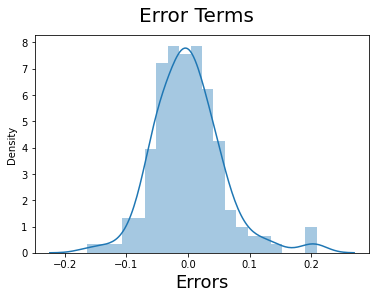

In [ ]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)
# Plot the histogram of the error terms
fig = plt.figure()
sb.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [ ]:
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [ ]:
y_test = df_test.pop('price')
X_test = df_test

In [ ]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [ ]:
y_pred = lm.predict(X_test_new)

In [ ]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.41815943175978176

Text(0, 0.5, 'y_pred')

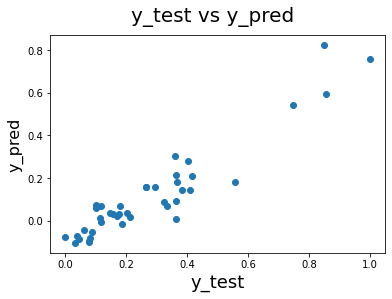

In [ ]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     473.5
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           3.55e-87
Time:                        16:58:35   Log-Likelihood:                 239.20
No. Observations:                 164   AIC:                            -468.4
Df Residuals:                     159   BIC:                            -452.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0906      0.014     -6.334      0.0

R-sqaured and Adjusted R-squared (extent of fit) - 0.923 and 0.921 - 90% variance explained.

p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. -
meaning that all the predictors are statistically significant.